In [21]:
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors
%matplotlib inline

from sklearn.model_selection import train_test_split,KFold,cross_val_score,ShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.tree import DecisionTreeClassifier

In [22]:
df = pd.read_csv('C:\\Users\\matan\\Downloads\\video-game-sales-with-ratings\\Video Games Sales.csv')
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
new = 

TypeError: '>=' not supported between instances of 'str' and 'int'

In [5]:
#About the columns:

#Name - Name of the game

#Platform - Console on which the game is running

#Year_of_Release - Year of the game released

#Genre - Game's category

#Publisher - Publisher

#NA_Sales - Game sales in North America (in millions of units)

#EU_Sales - Game sales in the European Union (in millions of units)

#JP_Sales - Game sales in Japan (in millions of units)

#Other_Sales - Game sales in the rest of the world, i.e. Africa, Asia excluding Japan, Australia, Europe excluding the E.U. and South America (in millions of units)

#Global_Sales - Total sales in the world (in millions of units)

#Critic_Score - Aggregate score compiled by Metacritic staff

#Critic_Count - The number of critics used in coming up with the Critic_score

#User_Score - Score by Metacritic's subscribers

#User_Count - Number of users who gave the user_score

#Developer - Party responsible for creating the game

#Rating - The ESRB ratings (E.g. Everyone, Teen, Adults Only..etc)

In [6]:
#We can see that there are some columns that have a lot of Nan values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
Name               16717 non-null object
Platform           16719 non-null object
Year_of_Release    16450 non-null float64
Genre              16717 non-null object
Publisher          16665 non-null object
NA_Sales           16719 non-null float64
EU_Sales           16719 non-null float64
JP_Sales           16719 non-null float64
Other_Sales        16719 non-null float64
Global_Sales       16719 non-null float64
Critic_Score       8137 non-null float64
Critic_Count       8137 non-null float64
User_Score         10015 non-null object
User_Count         7590 non-null float64
Developer          10096 non-null object
Rating             9950 non-null object
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [7]:
#Show all the different values in this column (and find out what is wrong - 'tbd' in this case which is a string)
df['User_Score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [8]:
#Replace the string value with NaN value
df['User_Score']=df['User_Score'].replace('tbd',np.nan)

In [9]:
#Convert this column's values to numeric
df['User_Score'] = pd.to_numeric(df['User_Score'])

In [10]:
#Fill al the numeric NaN values in the data with the average of its' column
df = df.fillna(df.mean())

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
Name               16717 non-null object
Platform           16719 non-null object
Year_of_Release    16719 non-null float64
Genre              16717 non-null object
Publisher          16665 non-null object
NA_Sales           16719 non-null float64
EU_Sales           16719 non-null float64
JP_Sales           16719 non-null float64
Other_Sales        16719 non-null float64
Global_Sales       16719 non-null float64
Critic_Score       16719 non-null float64
Critic_Count       16719 non-null float64
User_Score         16719 non-null float64
User_Count         16719 non-null float64
Developer          10096 non-null object
Rating             9950 non-null object
dtypes: float64(10), object(6)
memory usage: 2.0+ MB


In [12]:
#Now I will show you some plots that gives information about the data

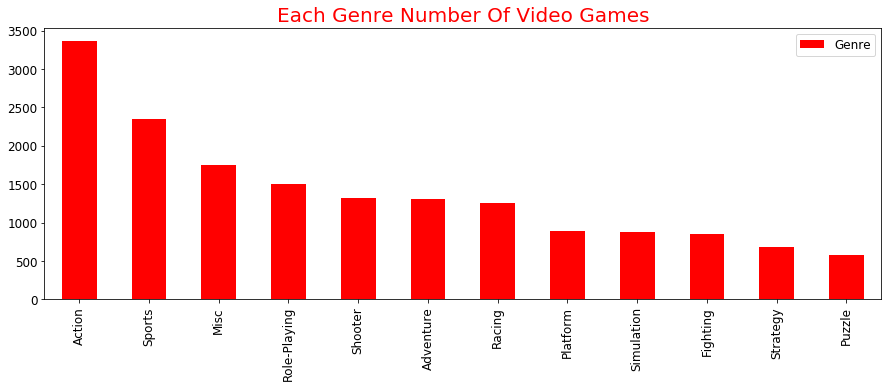

In [13]:
#We can see that the Action Genre has the most video games
genre_count = df['Genre'].value_counts()

genre_count.plot(kind = 'bar', figsize = (15, 5), facecolor = 'r')
plt.xticks(fontsize = 12, color = 'black')
plt.yticks(fontsize = 12, color = 'black')
plt.title("Each Genre Number Of Video Games", fontsize = 20, color = 'r')
plt.legend(fontsize = 12)
plt.show()

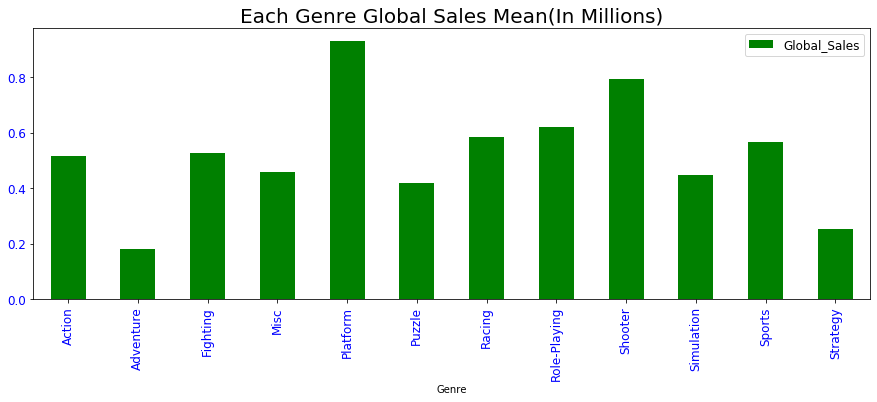

In [14]:
category_mean = df.groupby("Genre").mean()
category_mean['Global_Sales']

category_mean['Global_Sales'].plot(kind = 'bar', figsize = (15, 5), facecolor = 'g')
plt.xticks(fontsize = 12, color = 'b')
plt.yticks(fontsize = 12, color = 'b')
plt.title("Each Genre Global Sales Mean(In Millions)", fontsize = 20, color = 'black')
plt.legend(fontsize = 12)
plt.show()

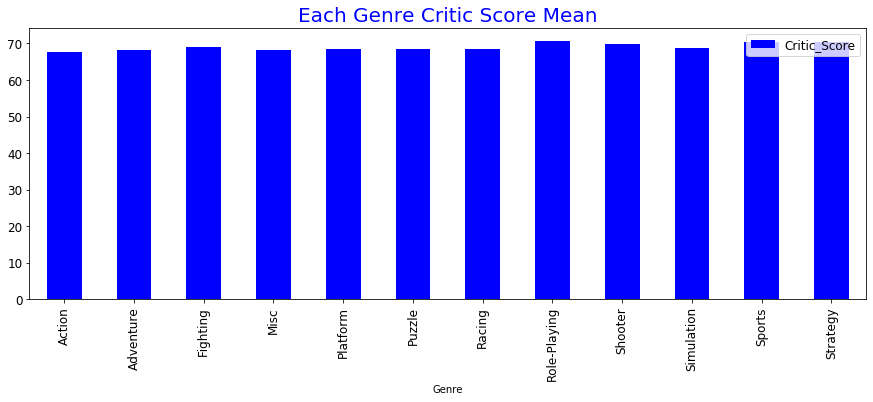

In [15]:
#We can see that all the Genres has similiar critic score average
genre_critic_score_mean = df.groupby("Genre").mean()
genre_critic_score_mean['Critic_Score']

genre_critic_score_mean['Critic_Score'].plot(kind = 'bar', figsize = (15, 5), facecolor = 'b')
plt.xticks(fontsize = 12, color = 'black')
plt.yticks(fontsize = 12, color = 'black')
plt.title("Each Genre Critic Score Mean", fontsize = 20, color = 'b')
plt.legend(fontsize = 12)
plt.show()

In [16]:
#Now I will divide the data to 2 options of critic score - 0 and 1, 0 is the good one which is at least 70,
#and 1 is the bad one which is below 70
df.loc[df['Critic_Score']>=70,'Score']=0
df.loc[df['Critic_Score']<70, 'Score']=1
df


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Score
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.000000,51.000000,8.000000,322.000000,Nintendo,E,0.0
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,68.967679,26.360821,7.125046,162.229908,NaN,NaN,1.0
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.000000,73.000000,8.300000,709.000000,Nintendo,E,0.0
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.000000,73.000000,8.000000,192.000000,Nintendo,E,0.0
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,68.967679,26.360821,7.125046,162.229908,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,68.967679,26.360821,7.125046,162.229908,NaN,NaN,1.0
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,68.967679,26.360821,7.125046,162.229908,NaN,NaN,1.0
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,68.967679,26.360821,7.125046,162.229908,NaN,NaN,1.0
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,68.967679,26.360821,7.125046,162.229908,NaN,NaN,1.0


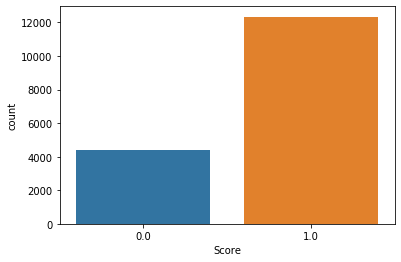

In [17]:
#We can see that there are a lot more 'bad scores' the 'good scores'
sns.countplot(df['Score'])


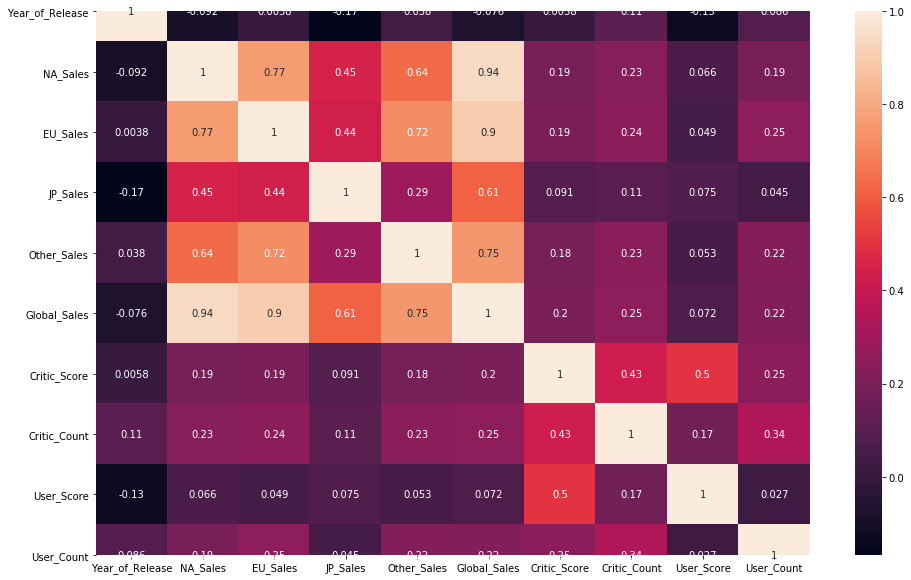

In [18]:
#We will see the connections between the features 
df['Category']=df.Genre
corr = df[['Platform', 'Year_of_Release', 'Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales',
          'Global_Sales','Critic_Score', 'Critic_Count', 'User_Score', 'User_Count']].corr()
plt.figure(figsize=(16,10))
sns.heatmap(corr, annot=True)

In [19]:
#I chose the features that their connection with the critic score is not to much 'strong' and not to much 'weak'
X = df[['NA_Sales','EU_Sales','Other_Sales','Global_Sales','Critic_Count', 'User_Score', 'User_Count']]
Y = df['Score']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, Y)
lgr=LogisticRegression()
lgr.fit(X_train,y_train)
print('Logistic Regression Accuracy :', lgr.score(X_test,y_test),"\n")

y_pred = lgr.predict(X_test)

print("Logistic Regression Matrix:")
print( confusion_matrix(y_test,y_pred),"\n")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Logistic Regression Accuracy : 0.8236842105263158 

Logistic Regression Matrix:
[[ 495  649]
 [  88 2948]] 

Classification Report:
              precision    recall  f1-score   support

         0.0       0.85      0.43      0.57      1144
         1.0       0.82      0.97      0.89      3036

    accuracy                           0.82      4180
   macro avg       0.83      0.70      0.73      4180
weighted avg       0.83      0.82      0.80      4180



C:\Users\matan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, Y)
dt=DecisionTreeClassifier(max_depth=4)
dt.fit(X_train,y_train)
print('Decision Tree Accuracy : ', dt.score(X_test,y_test),"\n")

y_pred = dt.predict(X_test)

print("Decision Tree Matrix:")
print(confusion_matrix(y_test,y_pred),"\n")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Decision Tree Accuracy :  0.8674641148325359 

Decision Tree Matrix:
[[ 915  208]
 [ 346 2711]] 

Classification Report:
              precision    recall  f1-score   support

         0.0       0.73      0.81      0.77      1123
         1.0       0.93      0.89      0.91      3057

    accuracy                           0.87      4180
   macro avg       0.83      0.85      0.84      4180
weighted avg       0.87      0.87      0.87      4180



In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, Y)
nb=GaussianNB()
nb.fit(X_train,y_train)
print('Naive Bayes Accuracy : ', nb.score(X_test,y_test),"\n")

y_pred = nb.predict(X_test)
print("Naive Bayes Matrix:")
print( confusion_matrix(y_test,y_pred),"\n")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Naive Bayes Accuracy :  0.7885167464114833 

Naive Bayes Matrix:
[[ 306  792]
 [  92 2990]] 

Classification Report:
              precision    recall  f1-score   support

         0.0       0.77      0.28      0.41      1098
         1.0       0.79      0.97      0.87      3082

    accuracy                           0.79      4180
   macro avg       0.78      0.62      0.64      4180
weighted avg       0.78      0.79      0.75      4180

